# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,798,103,56,100,185,59,11,216,31,24,173,219,684,219,75,15,11,186,194
1,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
2,821,104,56,96,231,74,11,220,30,25,172,223,713,218,73,6,16,186,195
3,587,84,38,74,138,57,8,139,49,18,127,160,282,127,72,9,20,183,191
4,440,101,51,98,194,60,10,195,34,22,161,219,572,219,67,0,10,192,201
5,511,88,38,77,156,56,7,163,41,20,129,184,395,140,67,1,9,192,198
6,317,95,45,105,208,64,10,187,36,22,150,202,520,158,64,7,32,198,211
7,453,95,43,71,159,64,6,145,45,19,141,169,322,171,67,8,4,195,200
8,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
9,139,91,42,80,162,66,8,148,44,19,145,171,331,147,70,3,5,189,199


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.803279,93.661202,44.794171,82.091075,168.757741,61.61020,8.369763,168.517304,41.003643,20.553734,147.755920,188.276867,438.502732,174.777778,72.271403,6.469945,12.644809,189.045537,195.708561
std,242.870166,8.257598,6.168223,15.916837,32.520425,6.75761,3.815532,33.246565,7.862643,2.591277,14.442896,31.221832,176.479198,32.741993,6.846140,4.933269,8.908470,6.178882,7.421041
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.00000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,223.000000,87.000000,40.000000,70.000000,141.000000,57.00000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,431.000000,93.000000,44.000000,79.000000,166.000000,61.00000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,363.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,638.000000,100.000000,49.000000,98.000000,194.000000,65.00000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,112.000000,306.000000,126.00000,55.000000,261.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,118.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Some scaling should have been applied because of a huge difference between extremes which is seen in describe() method.

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.304157,1.011168,0.022428,0.057819,0.868670,0.419371,-0.775770,0.757276,-1.016250,0.547076,-0.137782,1.159306,0.770656,-0.236826,0.873743,-1.297353,1.613351,0.660256,-0.623102
1,-0.554830,-0.690007,-0.301920,0.121261,-0.984710,-0.849087,0.529004,-0.446624,0.392752,-0.610954,0.137945,-0.466126,-0.509158,-0.329057,0.071877,-0.076711,-1.187468,-0.638381,0.049447
2,1.730005,-1.054545,-1.437137,-1.020711,-1.373322,-0.849087,-0.775770,-1.469940,1.929846,-1.382975,-1.378557,-1.549747,-1.290638,-1.343591,0.071877,-1.093913,0.605056,-0.476052,-0.757612
3,0.673576,-1.176057,-1.112789,-0.513167,-0.924923,-0.595396,-0.123383,-0.898087,1.033208,-0.996965,-1.447489,-0.912323,-0.894235,-1.466565,-0.061767,0.533610,0.829122,-0.963041,-0.623102
4,-0.460652,-0.446982,0.833298,0.501919,0.569738,-0.088012,0.311542,0.366009,-0.631977,0.161066,0.689401,0.713109,0.294973,1.392577,-0.462700,-0.076711,0.717089,0.335596,0.452977


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [31]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

params = {
    'max_iter': [250, 500, 1000],
    'solver': ['sag', 'saga'],
}
logreg_classifier = LogisticRegression(multi_class='multinomial', tol=1e-3)

model = GridSearchCV(estimator=logreg_classifier, param_grid=params, scoring='accuracy', cv=10, refit=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.797979797979798


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

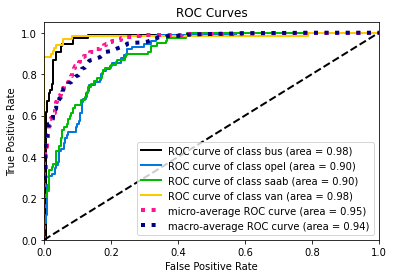

In [56]:
from scikitplot.metrics import plot_roc

y_proba = model.predict_proba(X_test)
plot_roc(y_test, y_proba)

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [70]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(min(X_train.shape))
pca.fit(X_train)
print(pca.explained_variance_ratio_)


[5.23828671e-01 1.63666941e-01 6.63313773e-02 6.29464030e-02
 5.35581047e-02 4.73888502e-02 2.83181045e-02 1.87635433e-02
 1.19135386e-02 8.75072832e-03 4.72940997e-03 3.07096118e-03
 2.16606529e-03 1.85592532e-03 9.61035694e-04 7.98732897e-04
 6.18830536e-04 3.14372929e-04 1.84041590e-05]


In [65]:
from matplotlib import pyplot as plt

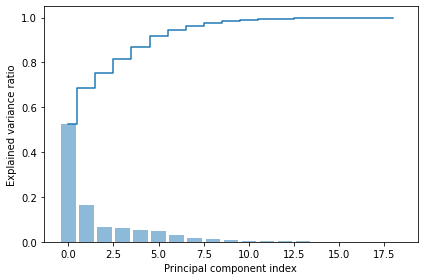

In [69]:
exp_var_pca = pca.explained_variance_ratio_
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center')
plt.step(range(0,len(np.cumsum(exp_var_pca))), np.cumsum(exp_var_pca), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?<br>
9 is about right judging by the plot if it was correct

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [84]:
### YOUR CODE HERE
pca = PCA(9)
fitted_train = pd.DataFrame(pca.fit_transform(X_train))
fitted_test = pd.DataFrame(pca.fit_transform(X_test))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [90]:
### YOUR CODE HERE
params = {
    'max_iter': [250, 500, 1000],
    'solver': ['sag', 'saga'],
}
logreg_classifier = LogisticRegression(multi_class='multinomial', tol=1e-3)

model = GridSearchCV(estimator=logreg_classifier, param_grid=params, scoring='accuracy', cv=10, refit=True)
model.fit(fitted_train, y_train)
y_pred = model.predict(fitted_test)
print(accuracy_score(y_test, y_pred))

0.4208754208754209


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [88]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
clf_tree = DecisionTreeClassifier()
params = {
    'max_depth': [1, 10, 50, 100],
}
model = GridSearchCV(estimator=clf_tree, param_grid=params, scoring='accuracy', cv=10, refit=True)
model.fit(fitted_train, y_train)
y_pred = model.predict(fitted_test)
print(accuracy_score(y_test, y_pred))

0.42424242424242425


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [105]:
# YOUR CODE HERE
from sklearn. ensemble import BaggingClassifier

logreg_classifier = LogisticRegression(multi_class='multinomial', tol=1e-3, max_iter=250, solver='sag')
tree_classifier = DecisionTreeClassifier(max_depth=50)
logregbag = BaggingClassifier(base_estimator=logreg_classifier, verbose=False)
treebag = BaggingClassifier(base_estimator=tree_classifier)

params = {
    'n_estimators': [1, 10, 50],
}
logreg_model = GridSearchCV(estimator=logregbag, param_grid=params, scoring='accuracy', cv=10, refit=True)
logreg_model.fit(fitted_train, y_train)
y_pred = logreg_model.predict(fitted_test)
print(accuracy_score(y_test, y_pred))

tree_model = GridSearchCV(estimator=treebag, param_grid=params, scoring='accuracy', cv=10, refit=True)
tree_model.fit(fitted_train, y_train)
y_pred = tree_model.predict(fitted_test)
print(accuracy_score(y_test, y_pred))

c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shata\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

0.4444444444444444
0.47474747474747475


The more trees we have the better basically. And logreg (as a linear model) shouldn't get any performance boost from bagging.

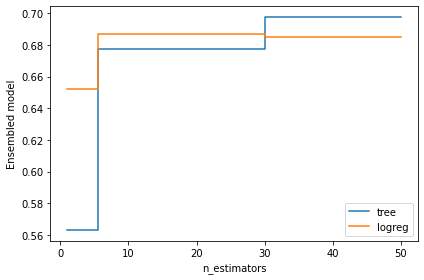

In [117]:
estimators = [1, 10, 50]
plt.step(estimators, tree_model.cv_results_['mean_test_score'], where='mid')
plt.step(estimators, logreg_model.cv_results_['mean_test_score'], where='mid')
plt.ylabel('Ensembled model')
plt.xlabel('n_estimators')
plt.tight_layout()
plt.legend(['tree', 'logreg'])
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [136]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rfc = RandomForestClassifier()
params = {
    'n_estimators': [2, 100, 500, 1000],
}
rfc_model = GridSearchCV(estimator=rfc, param_grid=params, scoring='accuracy', cv=10, refit=True)
rfc_model.fit(fitted_train, y_train)
y_pred = rfc_model.predict(fitted_test)
print(accuracy_score(y_test, y_pred))

0.494949494949495


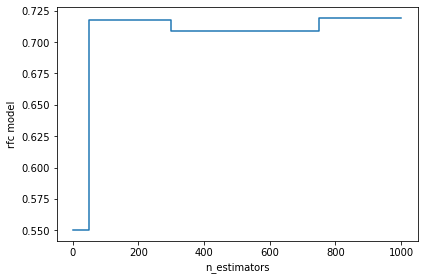

In [118]:
estimators = [2, 100, 500, 1000]
plt.step(estimators, rfc_model.cv_results_['mean_test_score'], where='mid')
plt.ylabel('rfc model')
plt.xlabel('n_estimators')
plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

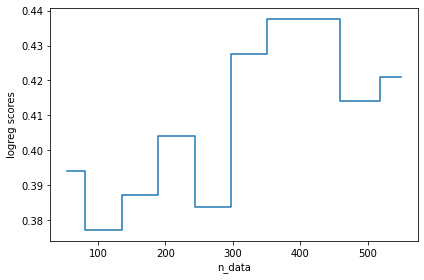

In [141]:
# YOUR CODE HERE
logreg_classifier = LogisticRegression(multi_class='multinomial', tol=1e-3, max_iter=250, solver='sag')

delim = fitted_train.shape[0] // 10
cur_ind = 0
n_data = []
scores = []
while cur_ind < fitted_train.shape[0]:
    cur_ind += delim
    if fitted_train.shape[0] - cur_ind  < delim:
        cur_ind = fitted_train.shape[0]
    n_data.append(cur_ind)
    logreg_classifier.fit(fitted_train.iloc[:cur_ind, :], y_train[:cur_ind])
    y_pred = logreg_classifier.predict(fitted_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.step(n_data, scores, where='mid')
plt.ylabel('logreg scores')
plt.xlabel('n_data')
plt.tight_layout()
plt.show()

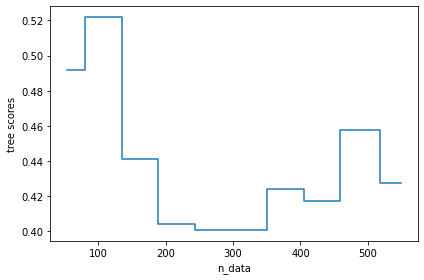

In [139]:
# YOUR CODE HERE
tree_classifier = DecisionTreeClassifier(max_depth=50)

delim = fitted_train.shape[0] // 10
cur_ind = 0
n_data = []
scores = []
while cur_ind < fitted_train.shape[0]:
    cur_ind += delim
    if fitted_train.shape[0] - cur_ind  < delim:
        cur_ind = fitted_train.shape[0]
    n_data.append(cur_ind)
    tree_classifier.fit(fitted_train.iloc[:cur_ind, :], y_train[:cur_ind])
    y_pred = tree_classifier.predict(fitted_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.step(n_data, scores, where='mid')
plt.ylabel('tree scores')
plt.xlabel('n_data')
plt.tight_layout()
plt.show()

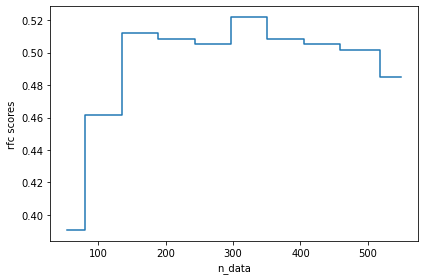

In [140]:
# YOUR CODE HERE
rfc = RandomForestClassifier(1000)

delim = fitted_train.shape[0] // 10
cur_ind = 0
n_data = []
scores = []
while cur_ind < fitted_train.shape[0]:
    cur_ind += delim
    if fitted_train.shape[0] - cur_ind  < delim:
        cur_ind = fitted_train.shape[0]
    n_data.append(cur_ind)
    rfc.fit(fitted_train.iloc[:cur_ind, :], y_train[:cur_ind])
    y_pred = rfc.predict(fitted_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.step(n_data, scores, where='mid')
plt.ylabel('rfc scores')
plt.xlabel('n_data')
plt.tight_layout()
plt.show()

The more data the better, although it seems like having all the data makes the model worse.<br>
Maybe first parts of train set correlate with testing data or I just screwed something in the process.